In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns

In [2]:
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")

In [3]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [6]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
test_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [8]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### null data checking
null data 를 얼마나 가지고 있는지를 반환

In [10]:
for col in train_df.columns:
    msg = 'columns: {:>10} \t Percent of NAN value : {:.2f}%'.format(col,100*(train_df[col].isnull().sum()/train_df[col].shape[0]))
    print(msg)                                

columns:   Survived 	 Percent of NAN value : 0.00%
columns:     Pclass 	 Percent of NAN value : 0.00%
columns:       Name 	 Percent of NAN value : 0.00%
columns:        Sex 	 Percent of NAN value : 0.00%
columns:        Age 	 Percent of NAN value : 19.87%
columns:      SibSp 	 Percent of NAN value : 0.00%
columns:      Parch 	 Percent of NAN value : 0.00%
columns:     Ticket 	 Percent of NAN value : 0.00%
columns:       Fare 	 Percent of NAN value : 0.00%
columns:      Cabin 	 Percent of NAN value : 77.10%
columns:   Embarked 	 Percent of NAN value : 0.22%


In [11]:
for col in test_df.columns:
    msg = 'columns: {:>10} \t Percent of NAN value : {:.2f}%'.format(col,100*(test_df[col].isnull().sum()/test_df[col].shape[0]))
    print(msg)       
#age와 cabin이 null을 많이 가지고 있음

columns:     Pclass 	 Percent of NAN value : 0.00%
columns:       Name 	 Percent of NAN value : 0.00%
columns:        Sex 	 Percent of NAN value : 0.00%
columns:        Age 	 Percent of NAN value : 20.57%
columns:      SibSp 	 Percent of NAN value : 0.00%
columns:      Parch 	 Percent of NAN value : 0.00%
columns:     Ticket 	 Percent of NAN value : 0.00%
columns:       Fare 	 Percent of NAN value : 0.24%
columns:      Cabin 	 Percent of NAN value : 78.23%
columns:   Embarked 	 Percent of NAN value : 0.00%


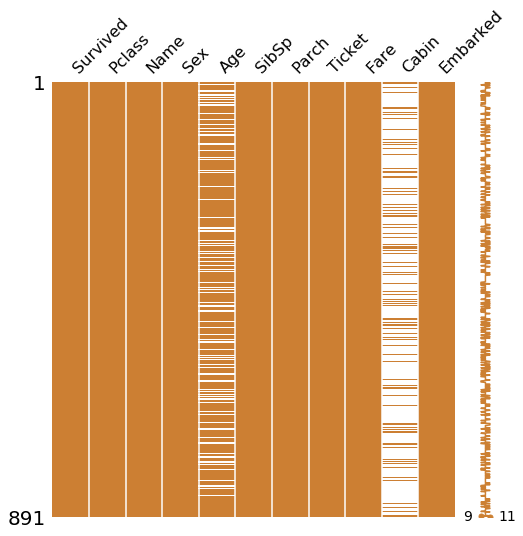

In [12]:
msno.matrix(df=train_df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1. Pclass
Pclass가 좋을 수록 생존률이 높은것을 확인 할 수 있다.

Pclass 1 = 63% Pclass 2 = 48% Pclass 3 = 25%

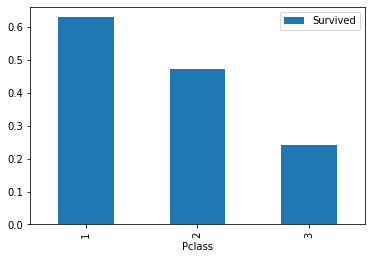

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

## 2. Sex
여자가 생존률이 남자의 생존률 보다 높다.

In [14]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## 3. Both Sex and Pclass
모든 클래스에서 여성의 생존률이 높다.  
또한, 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높아진다.

C:\Users\DataScience\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DataScience\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


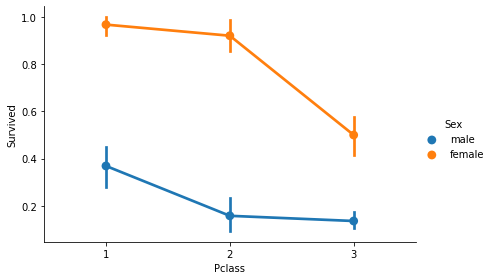

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df, 
               size=4, aspect=1.5)

## 4.age
나이가 어릴 수록 생존 할 확률이 높다.

using KED(Kernel Density Estimator)- 히스토그램의 분포를 곡선화 시켜준다.

In [16]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train_df['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(train_df['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(train_df['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


C:\Users\DataScience\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\DataScience\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


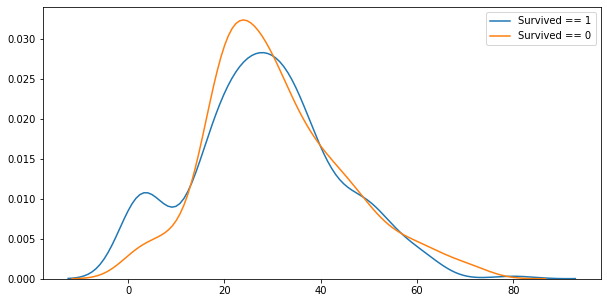

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

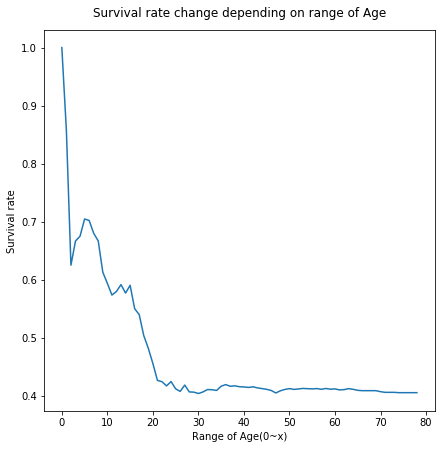

In [18]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train_df[train_df['Age'] < i]['Survived'].sum() / len(train_df[train_df['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()
# 나이가 어릴 수록 생존률이 높은 것을 확인할 수 있다.
#이는 나이가 중요한 freature라는 것을 의미한디.

## 5. Age and Pclass
class가 높을 수록 나이가 많은 사람의 비중이 커지는 것을 볼 수 있다.

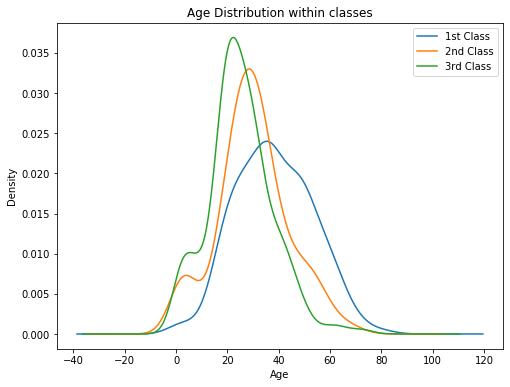

In [19]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
train_df['Age'][train_df['Pclass'] == 1].plot(kind='kde')
train_df['Age'][train_df['Pclass'] == 2].plot(kind='kde')
train_df['Age'][train_df['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

## 6.Pclass, Sex, Age
Pclass,Sex, Age 3개의 변수에 따른 생존(Survived)를 살펴고려고 한다.

먼저, Pclass and Age vs Survived 그래프에서는 Pclass 별로 Age의 Distribution을 보여준다. Pcalss 1은 다른 Pclass보다 나이가 많은 사람들이 존재한다. 반면, Pclass 3은 나이가 어린 사람이 주분포를 이룬다. 또한, 이 그래프에서 생존률을 살펴 볼 수 있다. 모든 클래스에서 나이가 어릴 수록 생존이 많은 것을 확인 할 수 있다.

두번째 그래프 Sex and Age vs Survived 에서는 명확히 여자가 생존을 많이 했음을 확인 할 수 있다.

이 둘을 종합하여 보면, 여자이면서 나이가 어릴 수록 생존을 많이 했음을 알 수 있다.

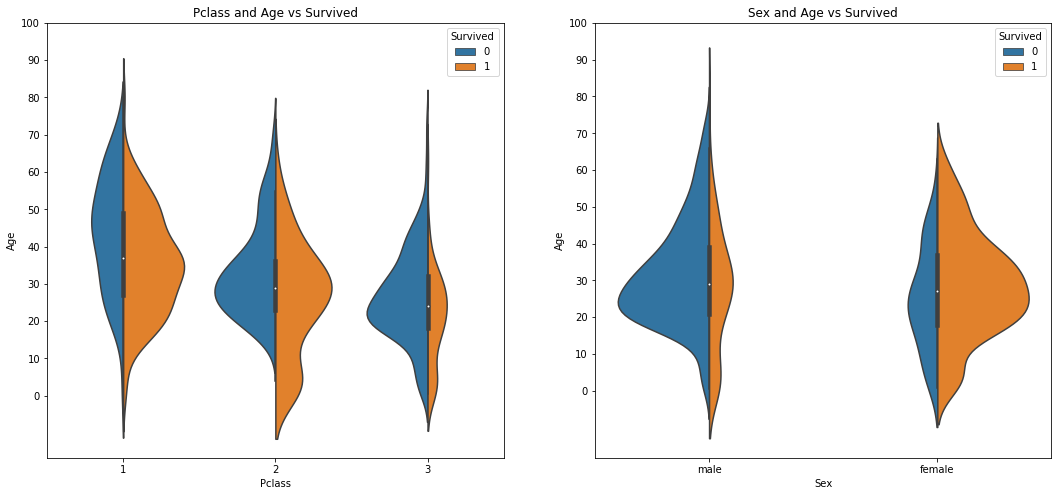

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 7. Embarked
탑승한 항구에 따른 생존률

C가 가장 높은 확률을 가지고 있지만, 전반적인 생존률에 큰 영향을 미치지는 않는 것으로 보인다.

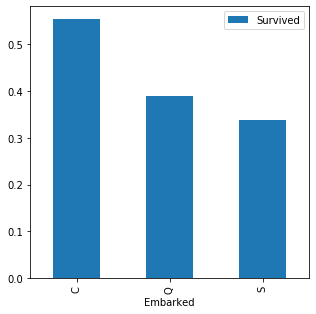

In [21]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

하지만 사용한 feature에 따라 model에 얼마나 중요한 역할을 하고 있는지 다르다. 따라서, 다른 feature로 split하여 살펴 보자.

(1) 가장 많은 사람이 탑승한 항구 : S  
(2) S는 남자가 많이 탑승함. 나머지 항구는 비슷한 성비를 보임  
(3) S의 겨우 생존확률이 적음  
(4) S는 3Plcass가 월등히 많음. 이를 통해 생존확률이 낮은 것을 확인 할 수 있음  
C가 생존확률이 높은 것은 클래스가 높은 사람이(Pclass1) 많이 탔기 때문  

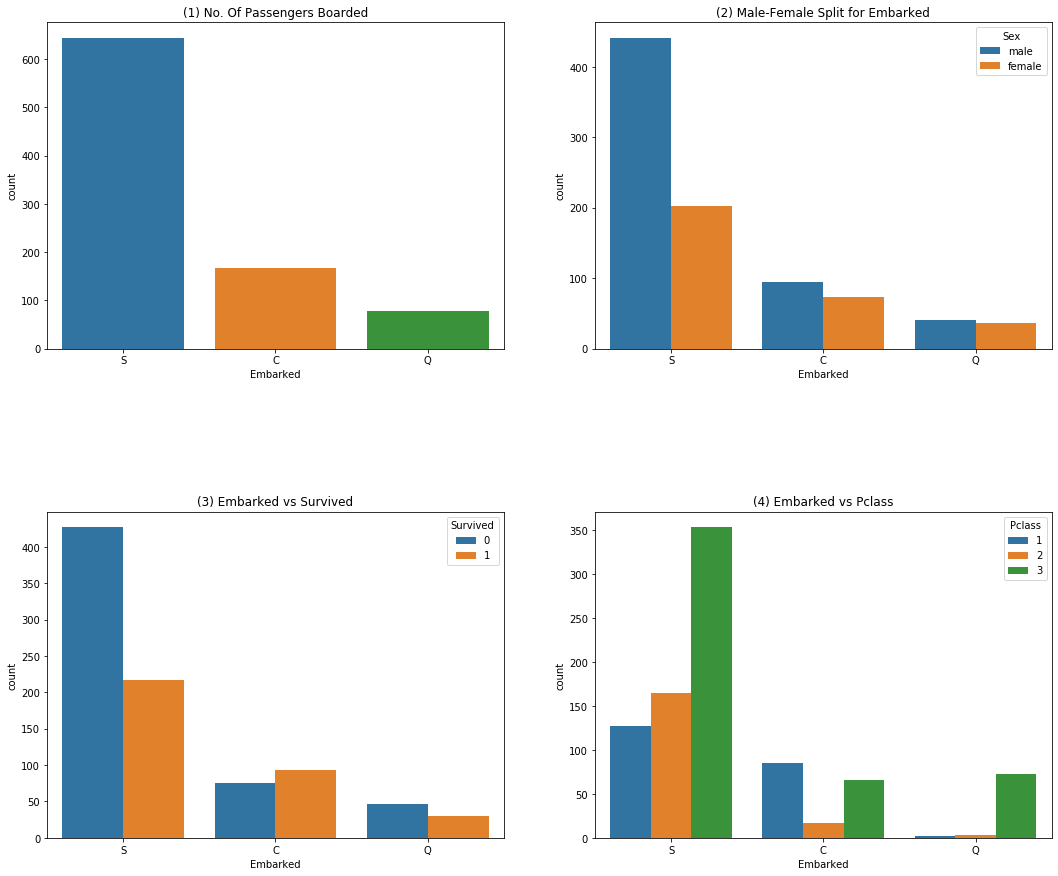

In [22]:
f,ax=plt.subplots(2, 2, figsize=(18,15))
sns.countplot('Embarked', data=train_df, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train_df, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train_df, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train_df, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 8. Family = Sibsp + Parch

형제 자매와 부모,자녀를 합쳐서 failmy를 이룬다.  
Figure(1) : 가족의 크기가 1-11명까지 있다. 대부분 1명이고 그 다음으로 2,3,4명이다.  
Figure(2)(3) :가족크기에 따른 생존비교이다. 가족이 4명인 경우 생존률이 가장 높다. 가족 수가 너무 적거나 너무 많을 수록 생존 확률이 낮아진다. 3~4명에서 생존확률이 가장 높은 것을 확인할 수 있다.

In [23]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [24]:
print("Maximum size of Family: ", train_df['FamilySize'].max())
print("Minimum size of Family: ", train_df['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


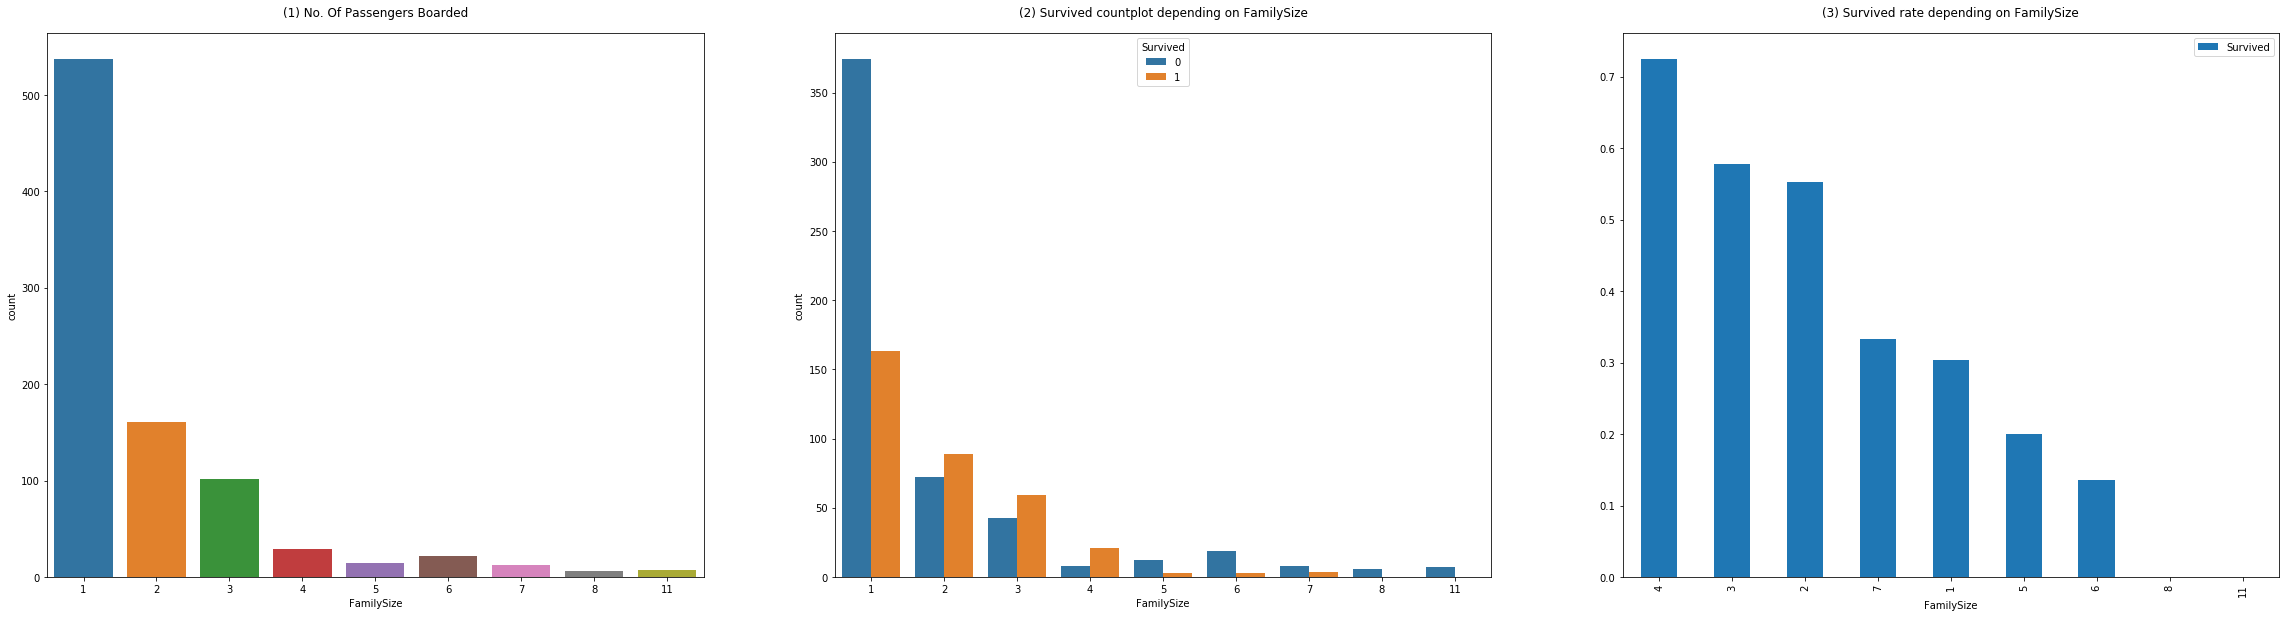

In [25]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=train_df, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 9.Fare

Fare는 contious feature.
Distribution이 매우 비대칭임을 확인하고, outlier의 영향을 줄이기 위해 Fare에 log를 취하여 준다.

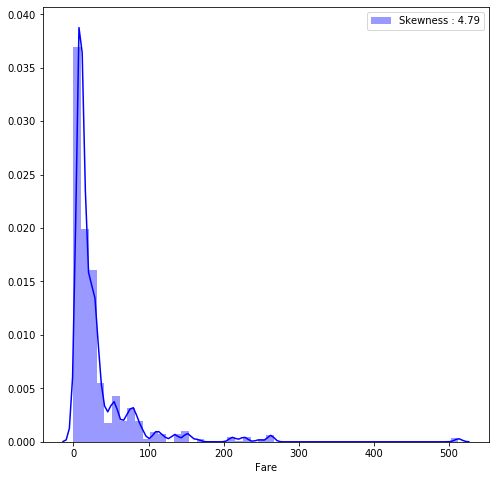

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_df['Fare'], color='b', label='Skewness : {:.2f}'.format(train_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [27]:
test_df.loc[test_df.Fare.isnull(), 'Fare'] = test_df['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

train_df['Fare'] = train_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test_df['Fare'] = test_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

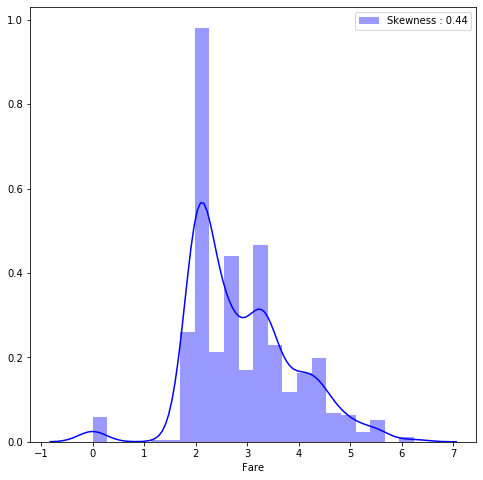

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_df['Fare'], color='b', label='Skewness : {:.2f}'.format(train_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')